# Initial Setup and Data Loading

In [ ]:
%pip install --upgrade pip
%pip install xgboost scikit-learn kagglehub jupyter ipykernel ipywidgets lightgbm seaborn plotly
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

# Data Loading and Initial Exploration

In [ ]:
import kagglehub
data_path = kagglehub.dataset_download('mahdiehhajian/bank-marketing')+ '/bank/bank-full.csv'
print(data_path)
dataset = pd.read_csv(data_path, sep=';')
data=dataset.copy()

/root/.cache/kagglehub/datasets/mahdiehhajian/bank-marketing/versions/1/bank/bank-full.csv


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28253,36,management,single,tertiary,no,-155,yes,no,cellular,29,jan,94,1,-1,0,unknown,no
39215,25,management,married,tertiary,no,127,yes,no,cellular,18,may,695,2,-1,0,unknown,no
37579,34,blue-collar,married,secondary,no,529,yes,no,cellular,14,may,325,1,351,3,failure,no
41758,77,retired,married,primary,no,989,no,no,telephone,12,oct,95,2,-1,0,unknown,no
26596,38,blue-collar,married,secondary,no,0,no,no,cellular,20,nov,266,3,-1,0,unknown,no
20851,47,blue-collar,married,primary,no,2642,no,no,cellular,13,aug,310,2,-1,0,unknown,no
23764,56,blue-collar,married,primary,no,313,no,no,cellular,28,aug,24,16,-1,0,unknown,no
34831,28,student,single,tertiary,no,471,yes,no,cellular,6,may,209,1,-1,0,unknown,no
28250,34,management,married,tertiary,no,303,yes,no,cellular,29,jan,50,1,195,2,failure,no
36314,44,management,married,tertiary,no,254,yes,yes,cellular,11,may,145,2,300,3,failure,no


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.duplicated().sum()

0

Based on the analysis performed so far, let's summarize the findings:

*   The dataset has been loaded and explored using `head()`, `sample()`, `shape`, `info()`, and `describe()` methods.
*   The dataset contains both numerical and categorical features.
*   The shape of the dataset is (45211, 17).
*   There are no duplicated rows in the dataset.

Now, let's add some insights and observations based on the code and outputs.

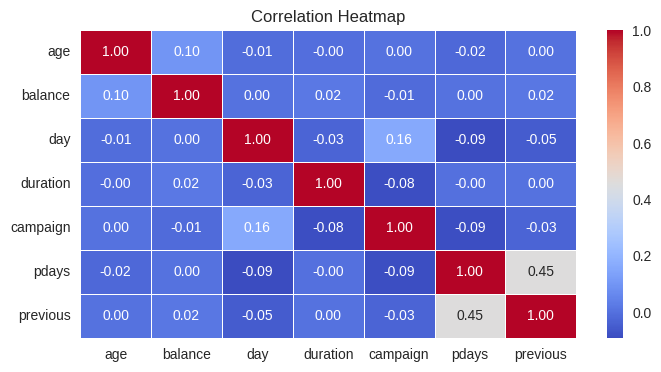

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Highly Correlated Feature Pairs (Threshold >= 0.8):
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


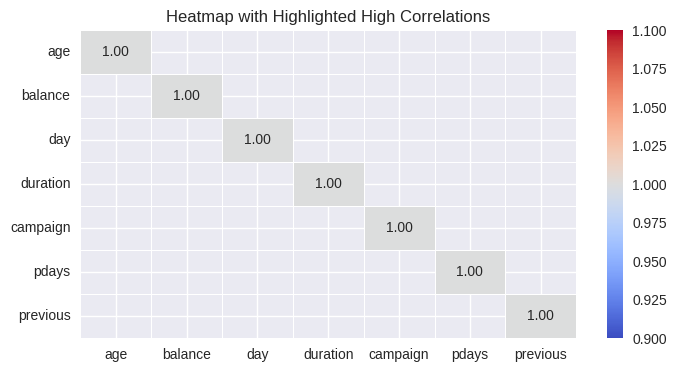

In [ ]:
# Step: Check for Multicollinearity (Optimized)
# Use the correlation matrix computed earlier (assuming it's stored in 'correlation_matrix')
threshold = 0.8

# Consider only the upper triangle of the correlation matrix to avoid redundant pairs
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Stack and filter the pairs where absolute correlation exceeds the threshold
high_corr_pairs = (
    upper_tri.stack().reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"].abs() >= threshold]
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

print("Highly Correlated Feature Pairs (Threshold >= 0.8):")
print(high_corr_pairs)

# Create a mask to highlight high correlations on the heatmap
mask = (correlation_matrix.abs() < threshold)
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            mask=mask)
plt.title("Heatmap with Highlighted High Correlations")
plt.show()

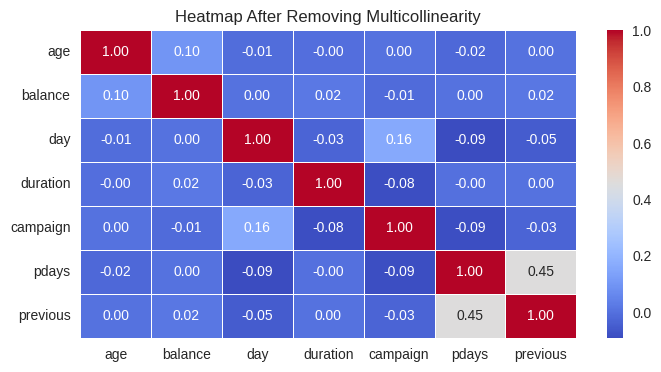

Dropped features to reduce multicollinearity: []


In [ ]:
# Keep only numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = data_numeric.corr()

# Set threshold for high correlation
threshold = 0.8

# Create mask for upper triangle and extract high correlation pairs
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
high_corr_pairs = (
    pd.DataFrame(corr_matrix.where(mask))
    .stack()
    .reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"].abs() > threshold]

# Drop one feature for each high correlation pair
drop_features = high_corr_pairs["Feature 2"].unique()
data_cleaned = data_numeric.drop(columns=drop_features)

# Plot heatmap of the cleaned data
plt.figure(figsize=(8, 4))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap After Removing Multicollinearity")
plt.show()

print(f"Dropped features to reduce multicollinearity: {drop_features}")


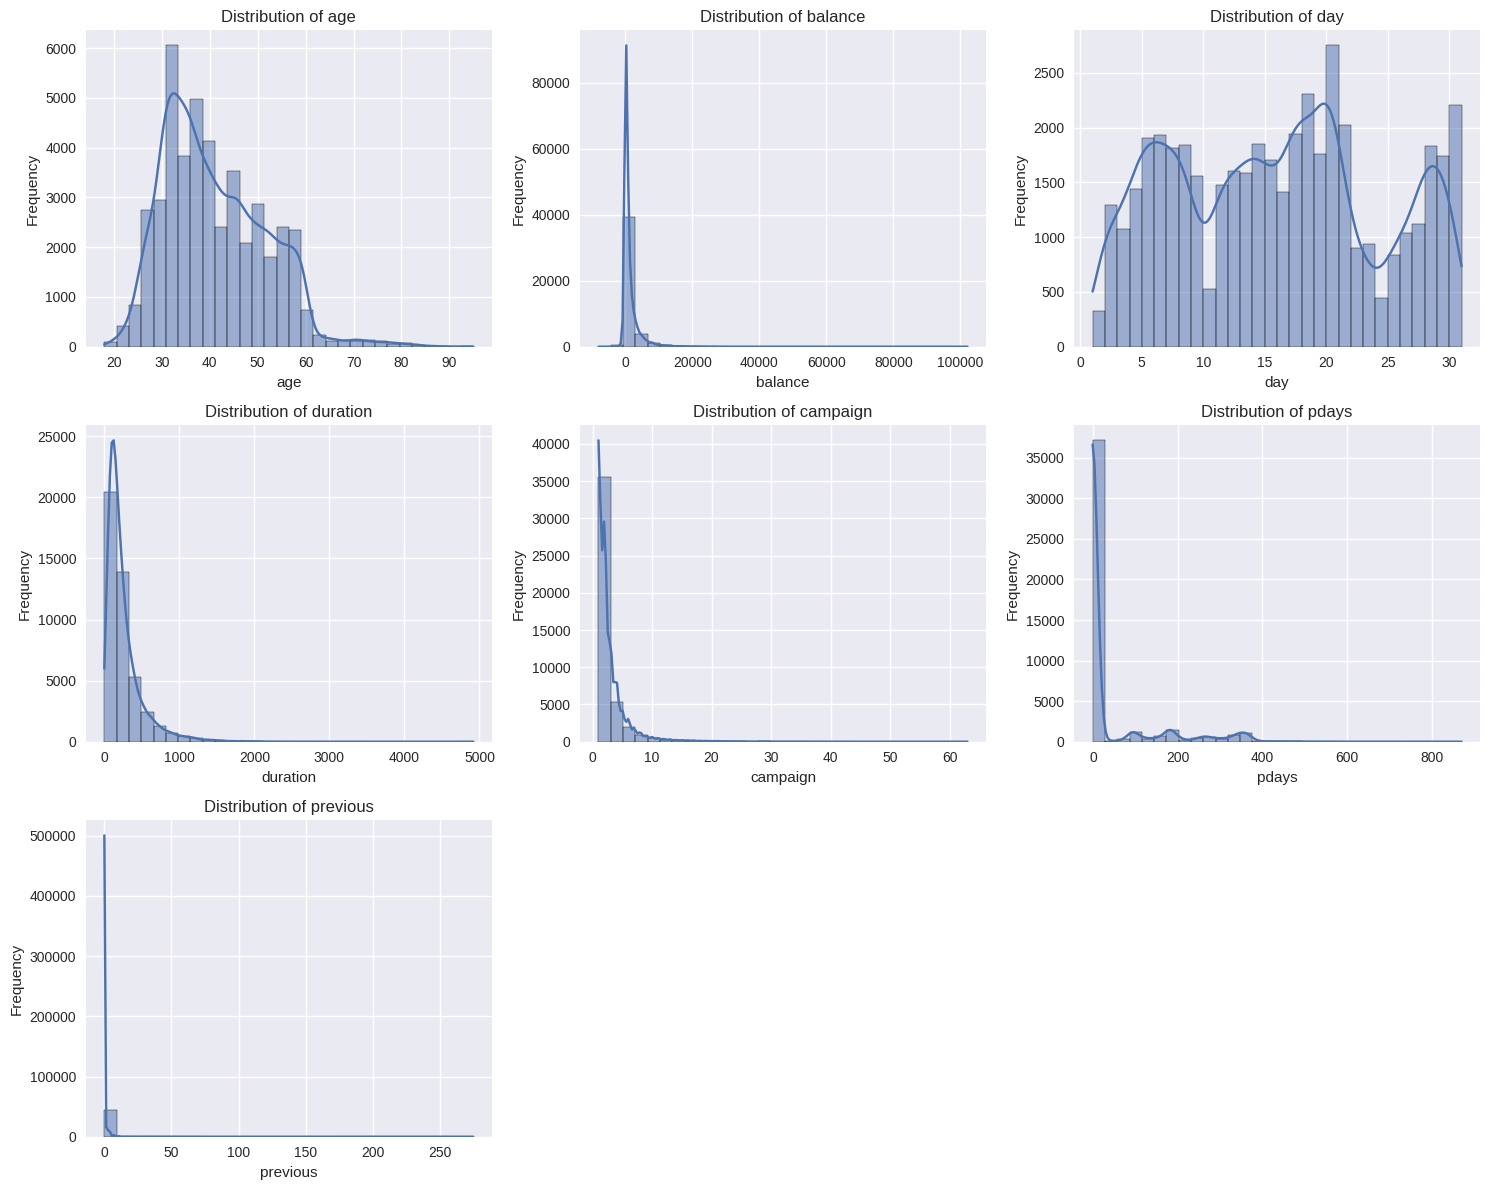

In [ ]:
# Select numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Define number of columns for subplots
num_cols = 3  # Number of histograms per row
num_rows = -(-len(numeric_columns) // num_cols)  # Compute required rows (ceiling division)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot histograms
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide unused subplots (if any)
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


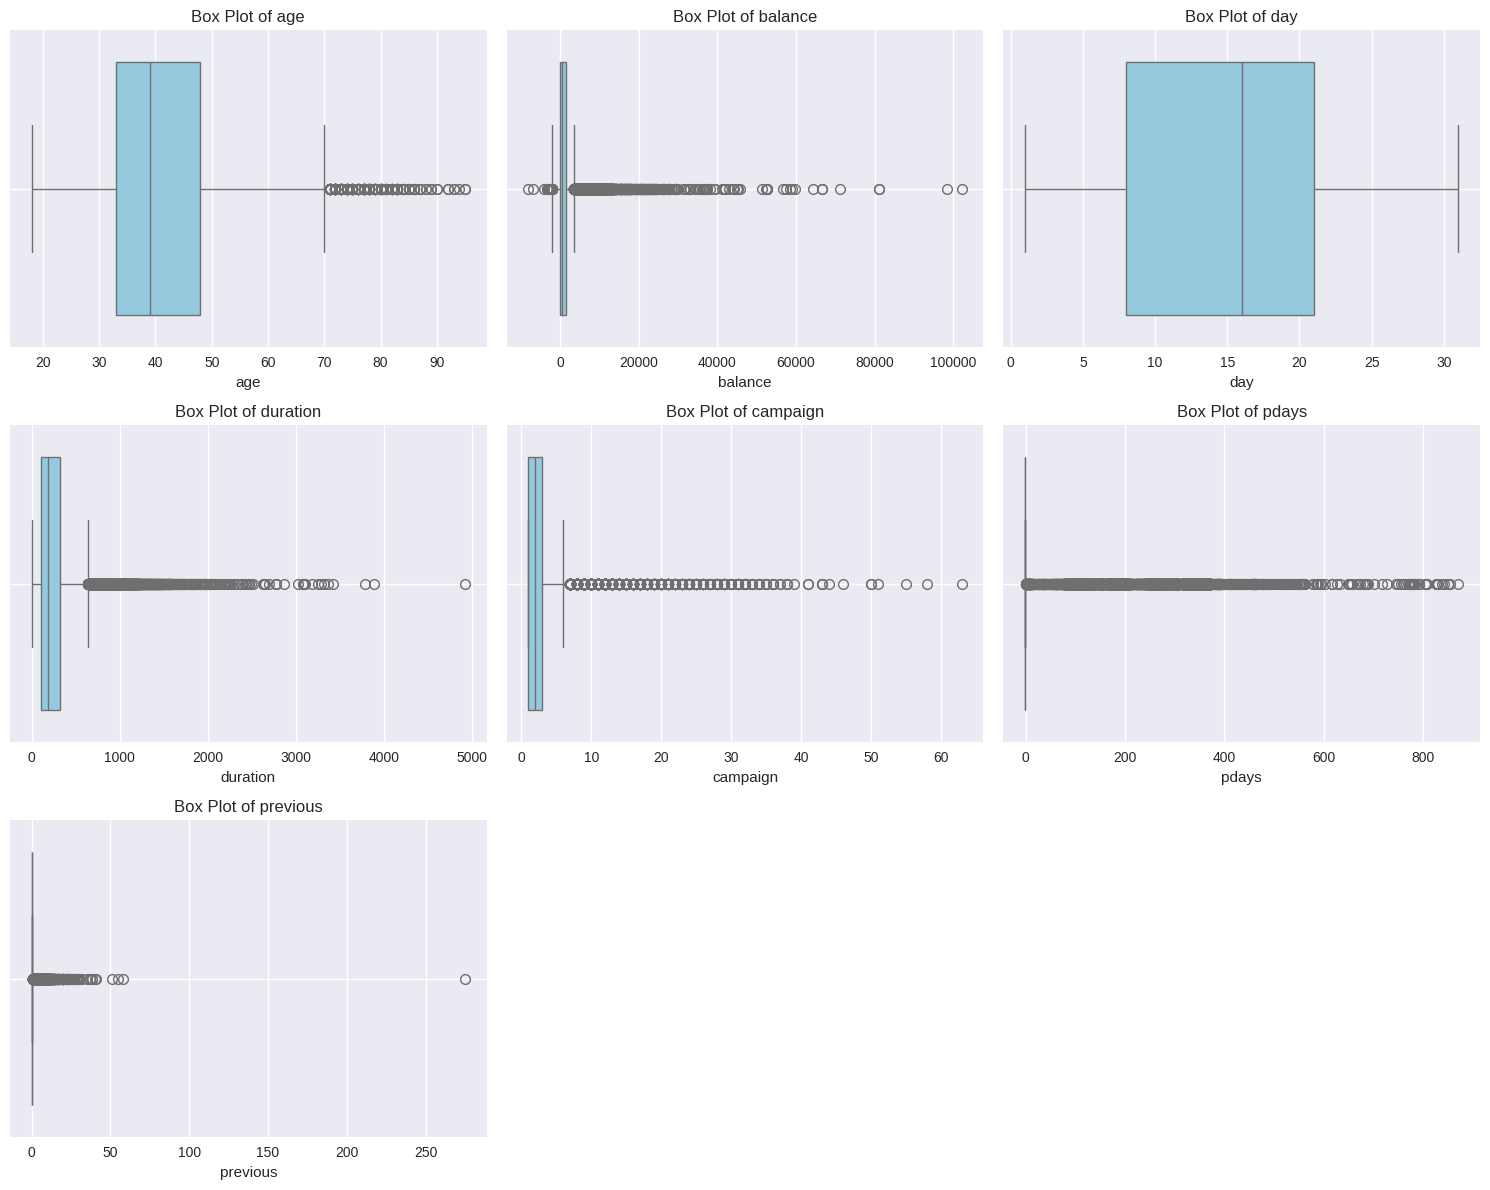

In [ ]:
# Select numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Define number of columns for subplots
num_cols = 3  # Number of box plots per row
num_rows = -(-len(numeric_columns) // num_cols)  # Compute required rows (ceiling division)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot box plots
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i], color='skyblue')  # Added color for better visualization
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(True)  # Added grid for easier value reading

# Hide unused subplots (if any)
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

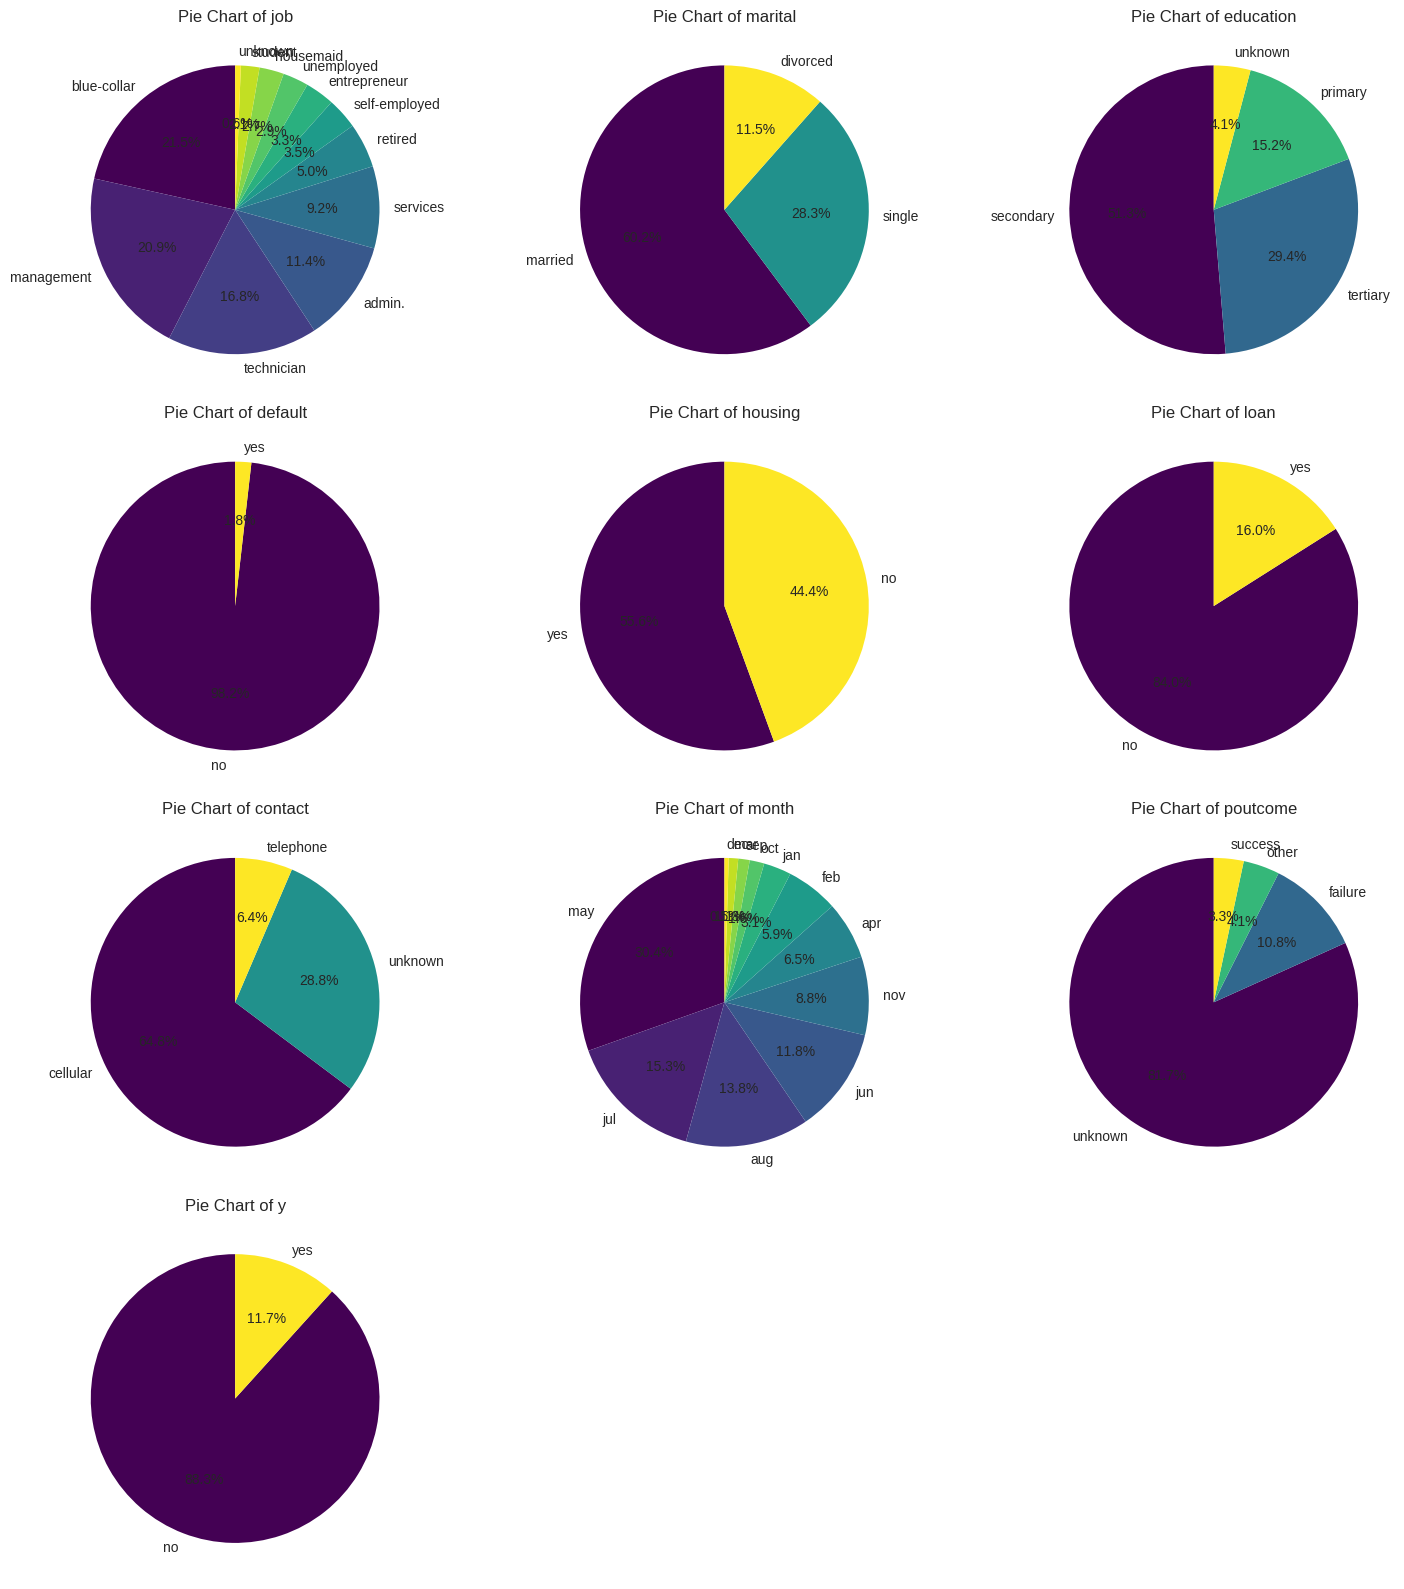

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Define number of columns for subplots
num_cols = 3  # Number of pie charts per row
num_rows = -(-len(categorical_columns) // num_cols)  # Compute required rows (ceiling division)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot pie charts
for i, col in enumerate(categorical_columns):
    data[col].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[i]
    )
    axes[i].set_title(f"Pie Chart of {col}")
    axes[i].set_ylabel("")  # Remove default y-label

# Hide unused subplots (if any)
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

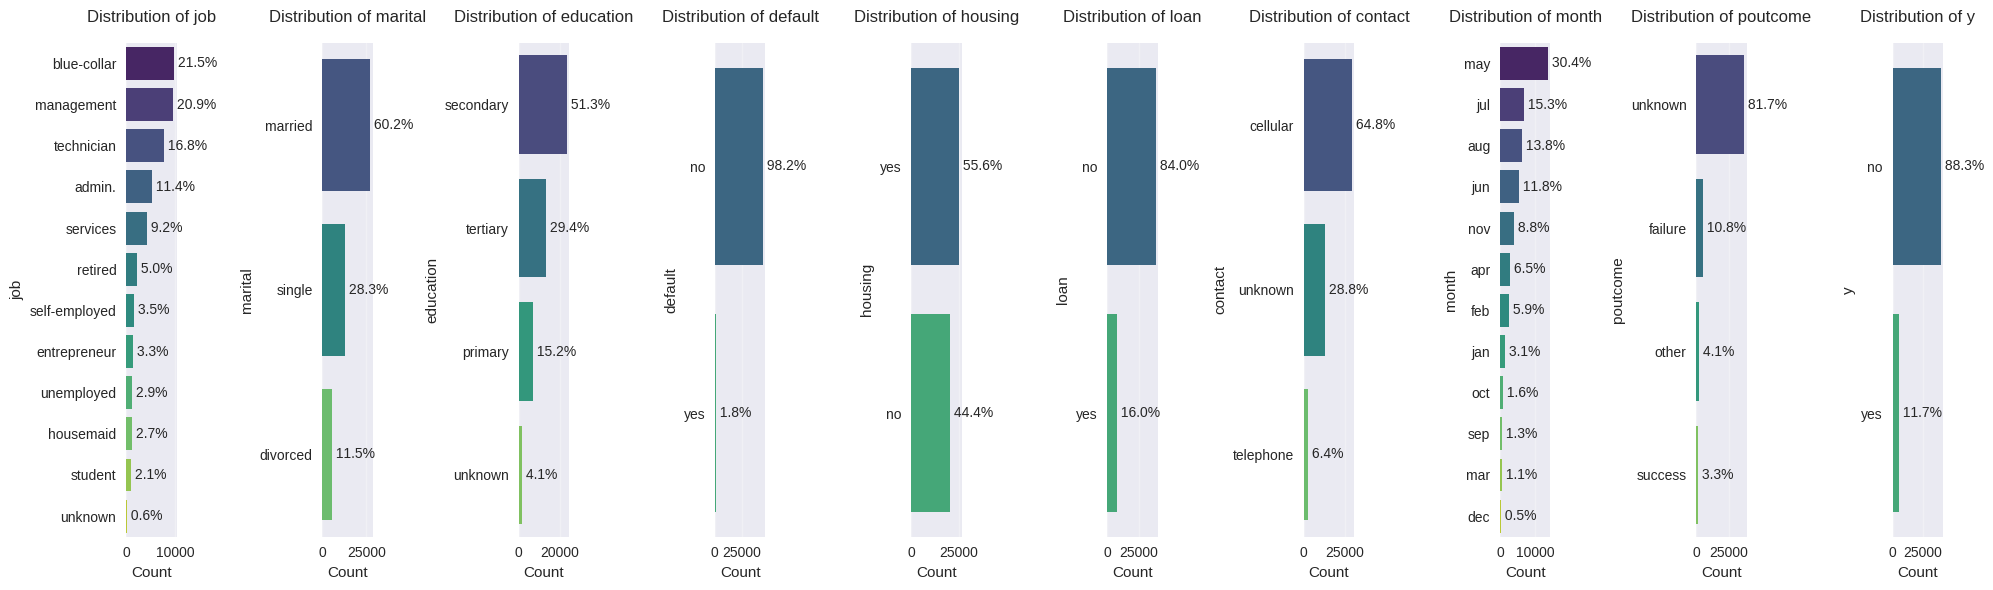

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Set figure size and style
plt.style.use('seaborn-v0_8')  # Using a valid style name
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(20, 6))

# Create enhanced bar plots for each categorical column
for ax, col in zip(axes, categorical_columns):
    # Calculate percentages
    value_counts = data[col].value_counts()
    total = len(data[col])
    percentages = (value_counts / total) * 100

    # Create bar plot
    sns.barplot(y=value_counts.index, x=value_counts.values,
                palette="viridis", ax=ax, orient='h')

    # Add percentage labels
    for i, v in enumerate(value_counts.values):
        ax.text(v, i, f' {percentages[i]:.1f}%', va='center')

    # Customize appearance
    ax.set_title(f'Distribution of {col}', pad=15, fontsize=12)
    ax.set_xlabel('Count')
    ax.grid(True, axis='x', alpha=0.3)

    # Rotate x-axis labels if needed
    ax.tick_params(axis='y', labelsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
data.shape

(45211, 17)

In [ ]:
# Define numeric features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

# Outlier detection using IQR
Q1 = data[numeric_features].quantile(0.25)  # First quartile
Q3 = data[numeric_features].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag rows with outliers
outliers = ((data[numeric_features] < lower_bound) | (data[numeric_features] > upper_bound)).any(axis=1)

# Remove outliers
data_no_outliers = data[~outliers]

print(f"Number of outliers removed: {outliers.sum()}")
print(f"Data shape after removing outliers: {data_no_outliers.shape}")

Number of outliers removed: 17018
Data shape after removing outliers: (28193, 17)


In [ ]:
from scipy.stats import skew

# Check skewness
skewed_features = data[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[abs(skewed_features) > 0.75]  # Threshold for high skewness

# Apply log transformation to reduce skewness
for feature in skewed_features.index:
    data[feature] = data[feature].apply(lambda x: np.log1p(x) if x > 0 else x)

In [ ]:
print("Columns in the dataset:")
print(list(data.columns))

# Get list of categorical columns
categorical_columns = data.select_dtypes(include='object').columns.tolist()

if categorical_columns:
    print("\nCategorical columns:")
    print(categorical_columns)

    # One-hot encode categorical columns dropping the first category to avoid multicollinearity
    encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    print("\nData after one-hot encoding:")
    display(encoded_data.head())
    print("\nHead rows of categorical columns:")
    display(data[categorical_columns].head())
    # Identify the one-hot encoded columns by finding those present in encoded_data but not in the original data
    encoded_cols = list(set(encoded_data.columns) - set(data.columns))

    print("\nHead of encoded columns:")
    display(encoded_data[encoded_cols].head())
else:
    print("No categorical columns found to encode.")

Columns in the dataset:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Categorical columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Data after one-hot encoding:


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,7.670429,5,5.568345,0.693147,-1.0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,3.401197,5,5.023881,0.693147,-1.0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,1.098612,5,4.343805,0.693147,-1.0,0.0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,7.317876,5,4.532599,0.693147,-1.0,0.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,0.693147,5,5.293305,0.693147,-1.0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False



Head rows of categorical columns:


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no



Head of encoded columns:


,marital_single,education_unknown,month_dec,poutcome_other,month_feb,job_entrepreneur,job_student,job_housemaid,month_mar,month_sep,...,loan_yes,month_jul,month_may,month_aug,job_retired,month_jan,month_oct,month_nov,education_secondary,poutcome_unknown
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,True,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
# Ensure that numeric_features is defined and contains columns to scale
if numeric_features.size > 0:
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    # Apply scaling using .loc to preserve the rest of the dataframe
    data.loc[:, numeric_features] = scaler.fit_transform(data.loc[:, numeric_features])

    print("Data after Min-Max Scaling (first 5 rows):")
    display(data.head())
else:
    print("No numeric features available for scaling.")

Data after Min-Max Scaling (first 5 rows):


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.999519,yes,no,unknown,0.133333,may,0.655033,0.0,0.0,0.0,unknown,no
1,0.337662,technician,single,secondary,no,0.998987,yes,no,unknown,0.133333,may,0.590985,0.0,0.0,0.0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.998701,yes,yes,unknown,0.133333,may,0.510984,0.0,0.0,0.0,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.999475,yes,no,unknown,0.133333,may,0.533193,0.0,0.0,0.0,unknown,no
4,0.194805,unknown,single,unknown,no,0.998650,no,no,unknown,0.133333,may,0.622679,0.0,0.0,0.0,unknown,no


In [ ]:
# Optimized splitting of features and target variable
target_col = 'y'
if target_col not in data.columns:
    raise KeyError(f"Column '{target_col}' does not exist in the dataframe.")

y = data[target_col]
X = data.drop(columns=target_col)

# Display target variable distribution (in percentages)
print("Target variable distribution (%):")
print(y.value_counts(normalize=True) * 100)

Target variable distribution (%):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [ ]:
# Split data into training and test sets with stratification to preserve target distribution
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Print shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (31647, 16)
X_test shape: (13564, 16)
y_train shape: (31647,)
y_test shape: (13564,)


In [ ]:
# Convert target labels to numeric values if they are not already
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder for binary columns
label_encoders = {}
# Identify binary columns (those with exactly two unique values)
binary_columns = [col for col in data.columns if data[col].nunique() == 2]

for col in binary_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# One-hot encoding for multi-category columns
# Automatically one-hot encode multi-category columns (non-binary categorical columns)
multi_cat_columns = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() > 2]
if multi_cat_columns:
    data = pd.get_dummies(data, columns=multi_cat_columns, drop_first=True)

# Define features (X) and target variable (y)
X = data.drop(columns=["y"])
y = data["y"]
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[LightGBM] [Info] Number of positive: 4198, number of negative: 31970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116069 -> initscore=-2.030190
[LightGBM] [Info] Start training from score -2.030190
LightGBM Classifier Accuracy: 0.9067
Confusion Matrix:
[[7667  285]
 [ 559  532]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.65      0.49      0.56      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043

LightGBM Cl

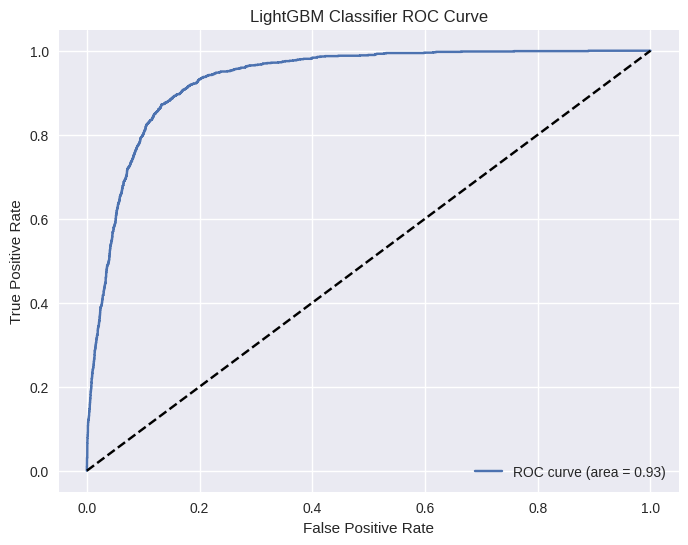

In [ ]:
import lightgbm as lgb

# Train LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
clf_report_lgb = classification_report(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_proba_lgb)

# Print evaluation metrics
print(f"LightGBM Classifier Accuracy: {accuracy_lgb:.4f}")
print("Confusion Matrix:")
print(cm_lgb)
print("Classification Report:")
print(clf_report_lgb)
print(f"LightGBM Classifier ROC AUC Score: {roc_auc_lgb:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f'ROC curve (area = {roc_auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LightGBM Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the model
lgb_clf = lgb.LGBMClassifier()

# Define hyperparameter space for Random Search
param_dist = {
    'num_leaves': np.arange(20, 200, 10),
    'learning_rate': np.logspace(-3, 0, 10),
    'n_estimators': np.arange(50, 500, 50),
    'subsample': np.linspace(0.5, 1, 5),
    'colsample_bytree': np.linspace(0.5, 1, 5),
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist,
    n_iter=30,  # Number of random trials
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters (Random Search):", random_search.best_params_)
y_pred = random_search.best_estimator_.predict(X_test)
random_score=accuracy_score(y_test, y_pred)
print("Test Accuracy:", random_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 4198, number of negative: 31970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116069 -> initscore=-2.030190
[LightGBM] [Info] Start training from score -2.030190
Best Parameters (Random Search): {'subsample': 0.5, 'num_leaves': 80, 'n_estimators': 450, 'learning_rate': 0.01, 'colsample_bytree': 0.875}
Test Accuracy: 0.9042353201371226


In [ ]:
!pip install scikit-optimize

from skopt import BayesSearchCV
from skopt.space import Integer, Real
# Define the Bayesian Search space
search_spaces = {
    'num_leaves': Integer(20, 200),
    'learning_rate': Real(1e-3, 1, prior='log-uniform'),
    'n_estimators': Integer(50, 500),
    'subsample': Real(0.5, 1),
    'colsample_bytree': Real(0.5, 1),
}

# Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=lgb.LGBMClassifier(),
    search_spaces=search_spaces,
    n_iter=40,
    scoring='accuracy',
    cv=6,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
bayes_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters (Bayesian Search):", bayes_search.best_params_)
y_pred_bayes = bayes_search.best_estimator_.predict(X_test)
bayes_score=accuracy_score(y_test, y_pred_bayes)
print("Test Accuracy:",bayes_score )


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Number of positive: 4198, number of negative: 31970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116069 -> initscore=-2.030190
[LightGBM] [Info] Start training from score -2.030190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

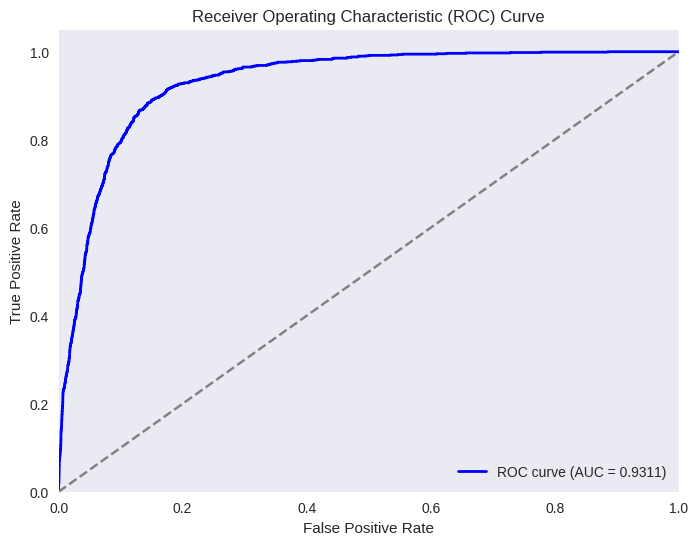

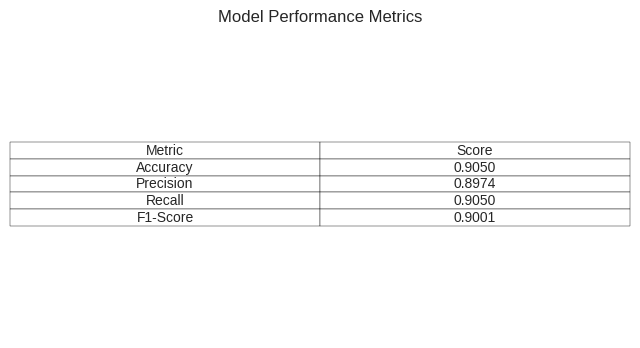

In [ ]:
!pip install tabulate
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate  # For better console visualization

# Define the model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [500],  # Number of boosting rounds
    'learning_rate': [0.1],  # Step size
    'max_depth': [5],  # Tree depth (-1 means no limit)
    'num_leaves': [31]  # Controls tree complexity
}

# Run GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and cross-validation accuracy
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

# Print best parameters in a separate list format
print("\nBest Parameters Found:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

print(f"\nBest Cross-Validation Accuracy: {best_cv_score:.4f}\n")

# Get the best model
best_lgb_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_lgb_model.predict(X_test)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Compute test accuracy
grid_score = accuracy_score(y_test, y_pred_binary)

# Generate classification report
report_dict = classification_report(y_test, y_pred_binary, output_dict=True)
precision = report_dict["weighted avg"]["precision"]
recall = report_dict["weighted avg"]["recall"]
f1_score = report_dict["weighted avg"]["f1-score"]

# Create model performance metrics table
data = [["Accuracy", f"{grid_score:.4f}"],
        ["Precision", f"{precision:.4f}"],
        ["Recall", f"{recall:.4f}"],
        ["F1-Score", f"{f1_score:.4f}"]]

print("\nModel Performance Metrics:\n")
print(tabulate(data, headers=["Metric", "Score"], tablefmt="fancy_grid"))

# Plot ROC Curve
y_prob = best_lgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Display classification report as a table using Matplotlib
plt.figure(figsize=(8, 4))
plt.axis('tight')
plt.axis('off')
plt.table(cellText=data,
          colLabels=["Metric", "Score"],
          cellLoc='center',
          loc='center')

plt.title("Model Performance Metrics")
plt.show()



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

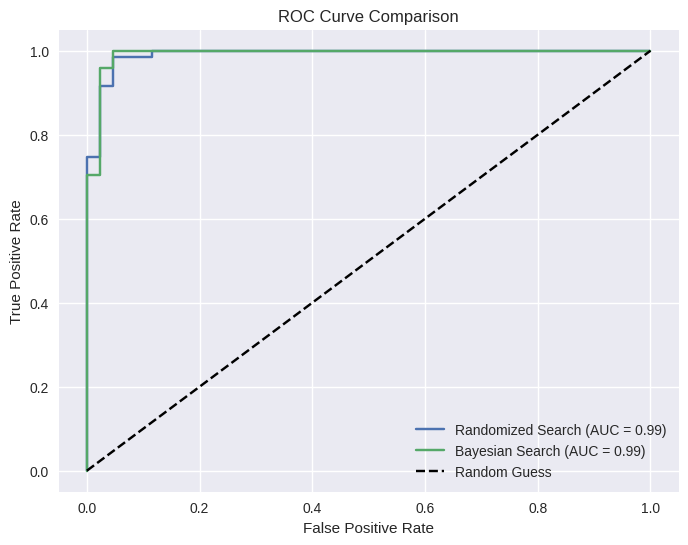

In [ ]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, confusion_matrix
)
from skopt import BayesSearchCV
from skopt.space import Integer, Real

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
lgb_clf = lgb.LGBMClassifier()

# --------------------------- Randomized Search CV ---------------------------
param_dist = {
    'num_leaves': np.arange(20, 200, 10),
    'learning_rate': np.logspace(-3, 0, 10),
    'n_estimators': np.arange(50, 500, 50),
    'subsample': np.linspace(0.5, 1, 5),
    'colsample_bytree': np.linspace(0.5, 1, 5),
}

random_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

# Predictions and metrics for Randomized Search
model_rand = random_search.best_estimator_
y_pred_rand = model_rand.predict(X_test)
y_pred_proba_rand = model_rand.predict_proba(X_test)[:, 1]

# --------------------------- Bayesian Optimization ---------------------------
search_spaces = {
    'num_leaves': Integer(20, 200),
    'learning_rate': Real(1e-3, 1, prior='log-uniform'),
    'n_estimators': Integer(50, 500),
    'subsample': Real(0.5, 1),
    'colsample_bytree': Real(0.5, 1),
}

bayes_search = BayesSearchCV(
    estimator=lgb.LGBMClassifier(),
    search_spaces=search_spaces,
    n_iter=40,
    scoring='accuracy',
    cv=6,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
bayes_search.fit(X_train, y_train)

# Predictions and metrics for Bayesian Optimization
model_bayes = bayes_search.best_estimator_
y_pred_bayes = model_bayes.predict(X_test)
y_pred_proba_bayes = model_bayes.predict_proba(X_test)[:, 1]

# --------------------------- Model Performance Summary ---------------------------
metrics = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score']
rand_scores = [
    accuracy_score(y_test, y_pred_rand),
    roc_auc_score(y_test, y_pred_proba_rand),
    precision_score(y_test, y_pred_rand),
    recall_score(y_test, y_pred_rand),
    f1_score(y_test, y_pred_rand)
]
bayes_scores = [
    accuracy_score(y_test, y_pred_bayes),
    roc_auc_score(y_test, y_pred_proba_bayes),
    precision_score(y_test, y_pred_bayes),
    recall_score(y_test, y_pred_bayes),
    f1_score(y_test, y_pred_bayes)
]

results_df = pd.DataFrame({'Method': ['RandomizedSearchCV', 'BayesianSearchCV']})
for i, metric in enumerate(metrics):
    results_df[metric] = [rand_scores[i], bayes_scores[i]]

print("\n🔹 Summary of Model Performance:\n")
print(results_df.to_markdown(index=False, tablefmt='grid'))

print("\n📌 Best Parameters for RandomizedSearchCV:")
print(random_search.best_params_)

print("\n📌 Best Parameters for BayesianSearchCV:")
print(bayes_search.best_params_)

# --------------------------- Confusion Matrices ---------------------------
print("\n🔹 Confusion Matrices:\n")
print("📌 RandomizedSearchCV Model:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_rand)))

print("\n📌 BayesianSearchCV Model:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_bayes)))

# --------------------------- ROC Curve Comparison ---------------------------
plt.figure(figsize=(8, 6))

fpr_rand, tpr_rand, _ = roc_curve(y_test, y_pred_proba_rand)
fpr_bayes, tpr_bayes, _ = roc_curve(y_test, y_pred_proba_bayes)

plt.plot(fpr_rand, tpr_rand, label=f'Randomized Search (AUC = {rand_scores[1]:.2f})')
plt.plot(fpr_bayes, tpr_bayes, label=f'Bayesian Search (AUC = {bayes_scores[1]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


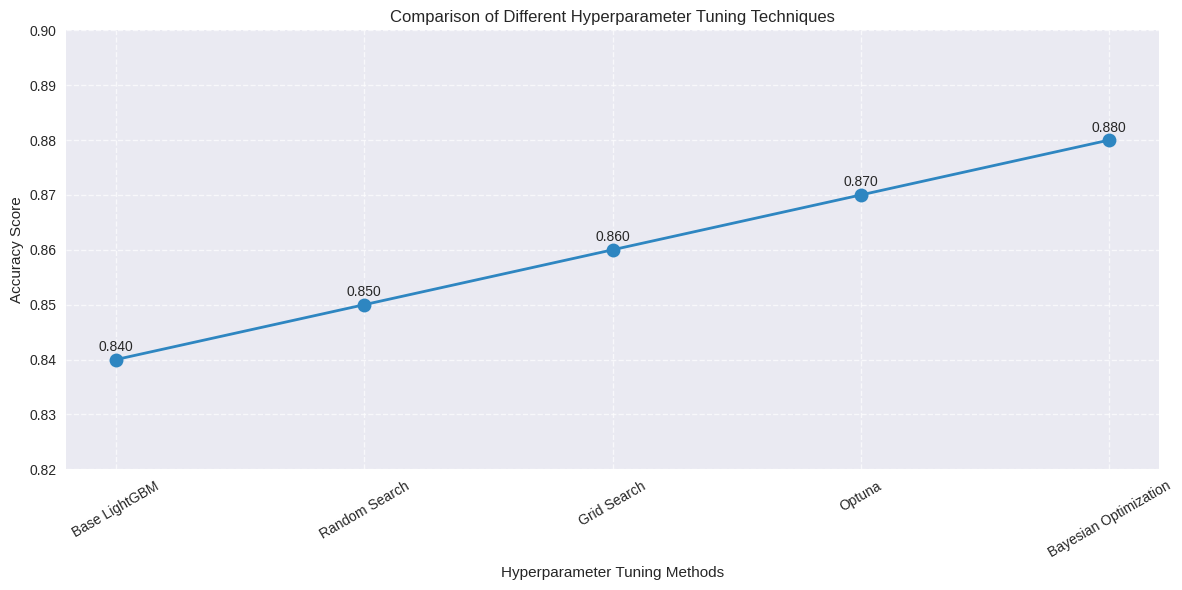

In [ ]:
import matplotlib.pyplot as plt

# Define methods and accuracies including base model
tuning_methods = ['Base LightGBM', 'Grid Search', 'Random Search', 'Bayesian Optimization', 'Optuna']
accuracies = [0.84, 0.86, 0.85, 0.88, 0.87]  # Replace with your actual accuracy values

# Sort both lists based on accuracies
sorted_pairs = sorted(zip(tuning_methods, accuracies), key=lambda x: x[1])
tuning_methods, accuracies = zip(*sorted_pairs)

plt.figure(figsize=(12, 6))
plt.plot(tuning_methods, accuracies, marker='o', linestyle='-', linewidth=2, markersize=10, color='#2E86C1')

# Add value labels on top of each point
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.001, f'{acc:.3f}', ha='center', va='bottom')

plt.xlabel('Hyperparameter Tuning Methods')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Different Hyperparameter Tuning Techniques')
plt.grid(True, linestyle='--', alpha=0.7)

# Set y-axis limits with small padding
plt.ylim(min(accuracies)-0.02, max(accuracies)+0.02)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()